# Exploring Treecover Loss 

This notebook expolores treecover loss data from 2001 to 2019. 

The dataset can be downloaded here: [Treecover data](https://www.globalforestwatch.org/dashboards/country/USA/?category=summary&location=WyJjb3VudHJ5IiwiVVNBIl0%3D&map=eyJjZW50ZXIiOnsibGF0Ijo1My4zODMzMjgzNjc1Nzk0NjYsImxuZyI6LTExNi42MzA4NTkzNzQ5ODUxMn0sImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJ0cmVlLWNvdmVyLWxvc3MiLCJsYXllcnMiOlsidHJlZS1jb3Zlci1sb3NzIl0sIm9wYWNpdHkiOjEsInZpc2liaWxpdHkiOnRydWUsInBhcmFtcyI6eyJ0aHJlc2giOjMwLCJ2aXNpYmlsaXR5Ijp0cnVlfX1dfQ%3D%3D&national-land-cover-database=eyJpbnRlcmFjdGlvbiI6e319)

In [1]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (25, 15)

In [2]:
# Import the dataset
tc = pd.read_csv('../rawData/treecover_loss__ha.csv')

In [3]:
# Let's take a look at the data
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   umd_tree_cover_loss__year           19 non-null     int64  
 1   whrc_aboveground_biomass_loss__Mg   19 non-null     float64
 2   umd_tree_cover_loss__ha             19 non-null     float64
 3   whrc_aboveground_co2_emissions__Mg  19 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 736.0 bytes


In [4]:
# Inspect the top of the table
tc.head()

,umd_tree_cover_loss__year,whrc_aboveground_biomass_loss__Mg,umd_tree_cover_loss__ha,whrc_aboveground_co2_emissions__Mg
0,2001,3.054507e+08,1.943319e+06,5.599930e+08
1,2002,3.411315e+08,2.038436e+06,6.254078e+08
2,2003,2.624315e+08,1.649384e+06,4.811245e+08
3,2004,3.870139e+08,2.746257e+06,7.095255e+08
4,2005,3.510236e+08,2.691544e+06,6.435433e+08


In [5]:
# Inspect the end of the table
tc.tail()

,umd_tree_cover_loss__year,whrc_aboveground_biomass_loss__Mg,umd_tree_cover_loss__ha,whrc_aboveground_co2_emissions__Mg
14,2015,2.828879e+08,2.289649e+06,5.186278e+08
15,2016,3.470263e+08,2.264067e+06,6.362148e+08
16,2017,3.609917e+08,2.311358e+06,6.618182e+08
17,2018,3.622077e+08,2.092359e+06,6.640474e+08
18,2019,3.068019e+08,2.109918e+06,5.624702e+08


## Visualizing Treecover Loss Data
The tables are great, but I'm a visual person. Let's take a look at some charts!

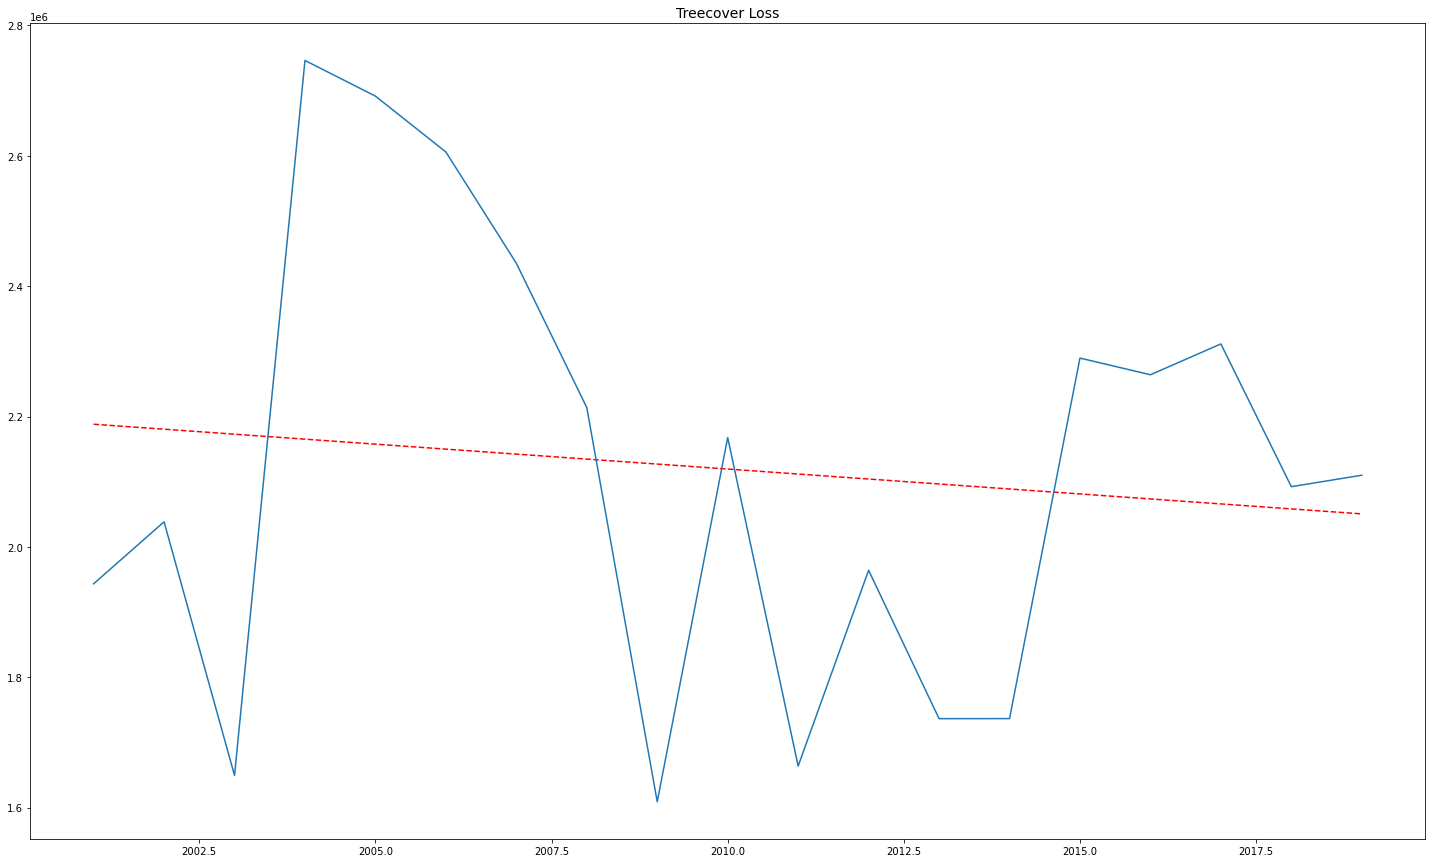

In [6]:
# Visualizing treecover loss with a trendline

# create a figure
fig, ax = plt.subplots(figsize=(25, 15))

# variable for years
X = np.array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

# variable for treecover loss
loss = tc.umd_tree_cover_loss__ha

# plot paramaters
z = np.polyfit(X, loss, 1)
p = np.poly1d(z)
ax.plot(X,p(X),"r--")
ax.plot(X, loss)
ax.set_title('Treecover Loss', fontsize=14);


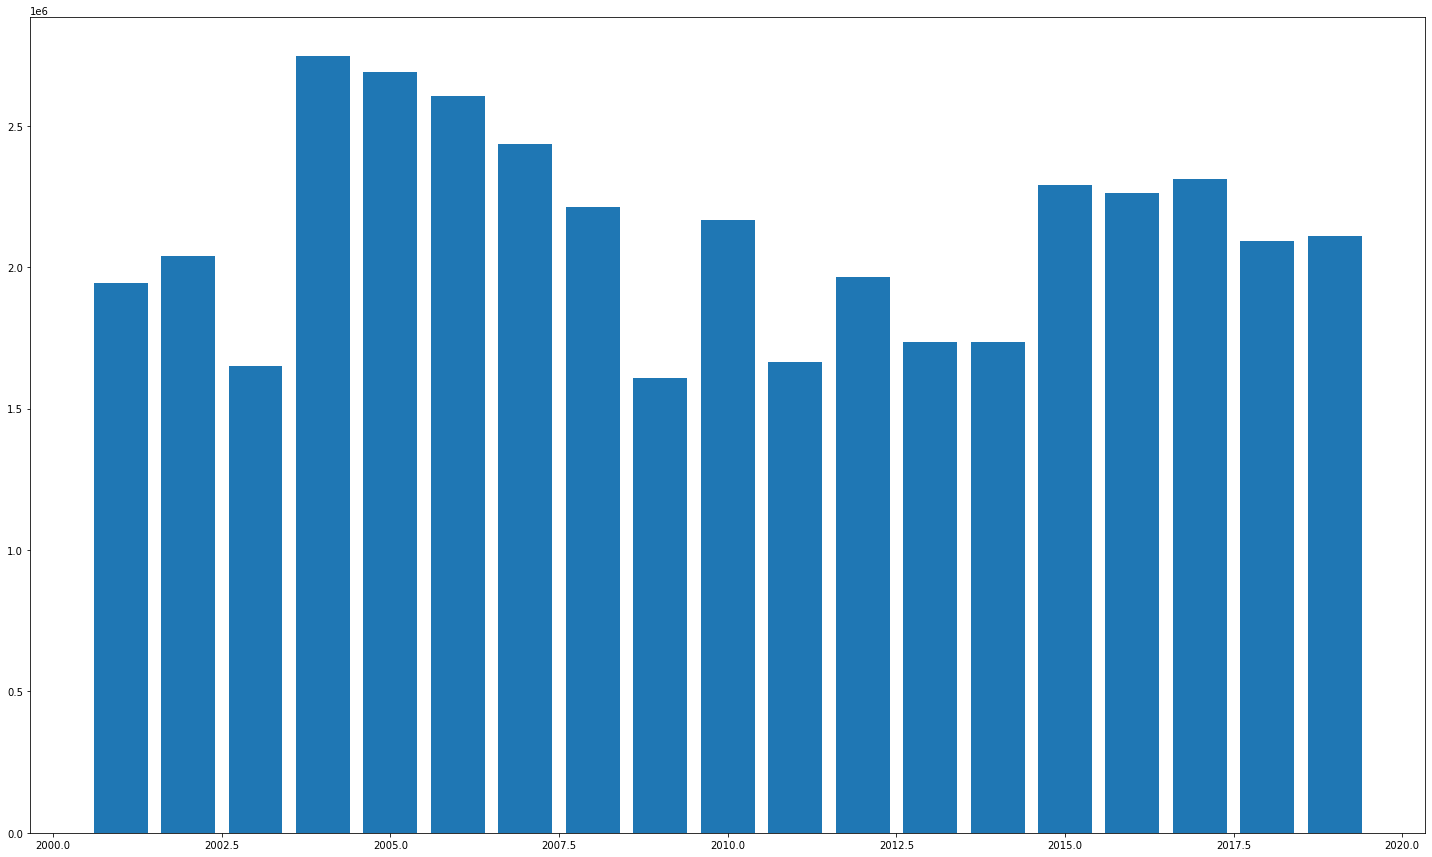

In [7]:
# Visualizing treecover loss in a bar chart

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

ax.bar(X, loss);

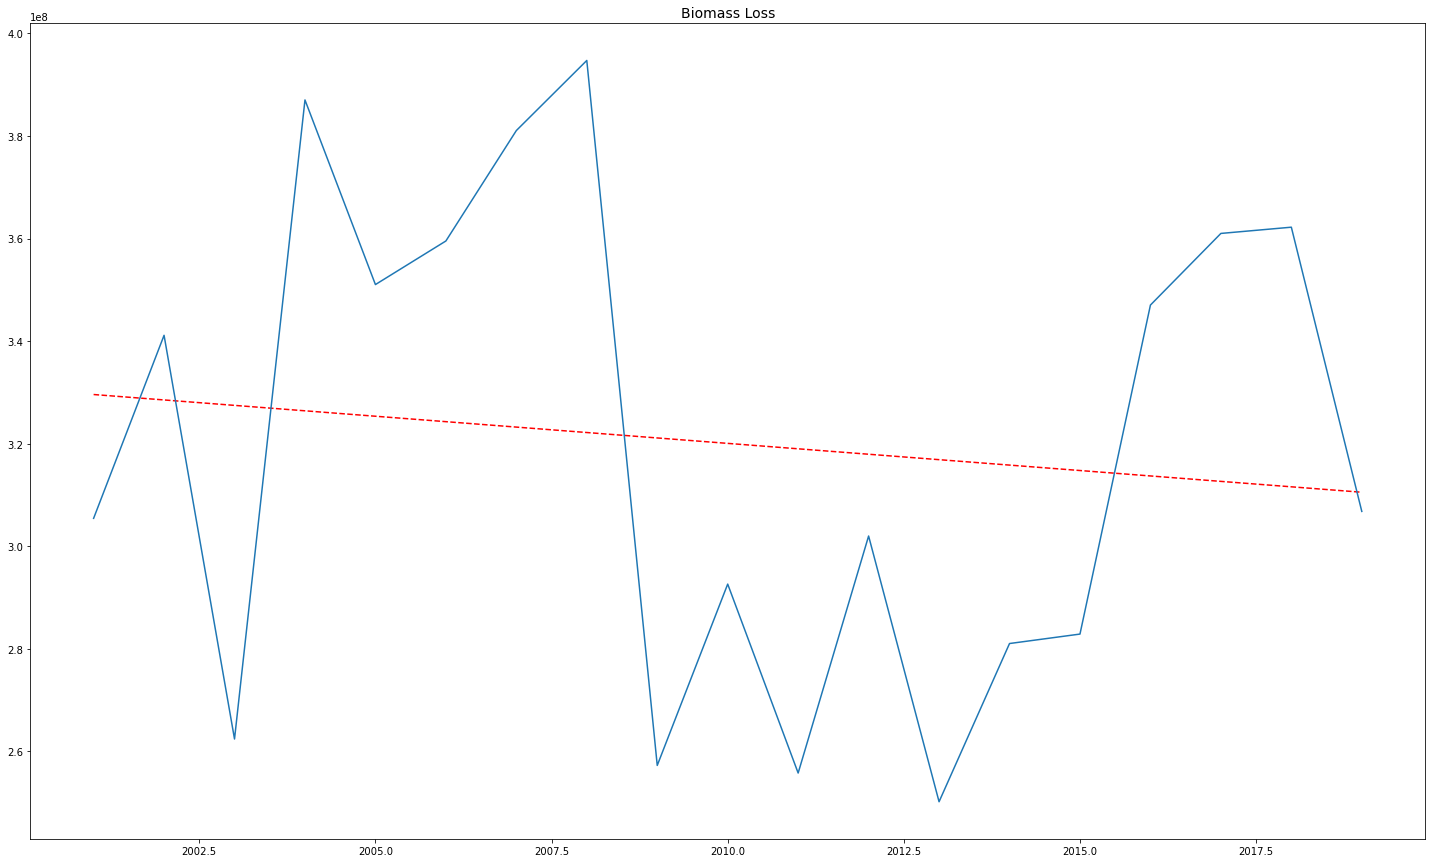

In [8]:
# Visualizing Biomass loss with a trendline

bioLoss = tc.whrc_aboveground_biomass_loss__Mg


# create a figure
fig, ax = plt.subplots(figsize=(25, 15))


# plot paramaters
z = np.polyfit(X, bioLoss, 1)
p = np.poly1d(z)
ax.plot(X,p(X),"r--")
ax.plot(X, bioLoss)
ax.set_title('Biomass Loss', fontsize=14);

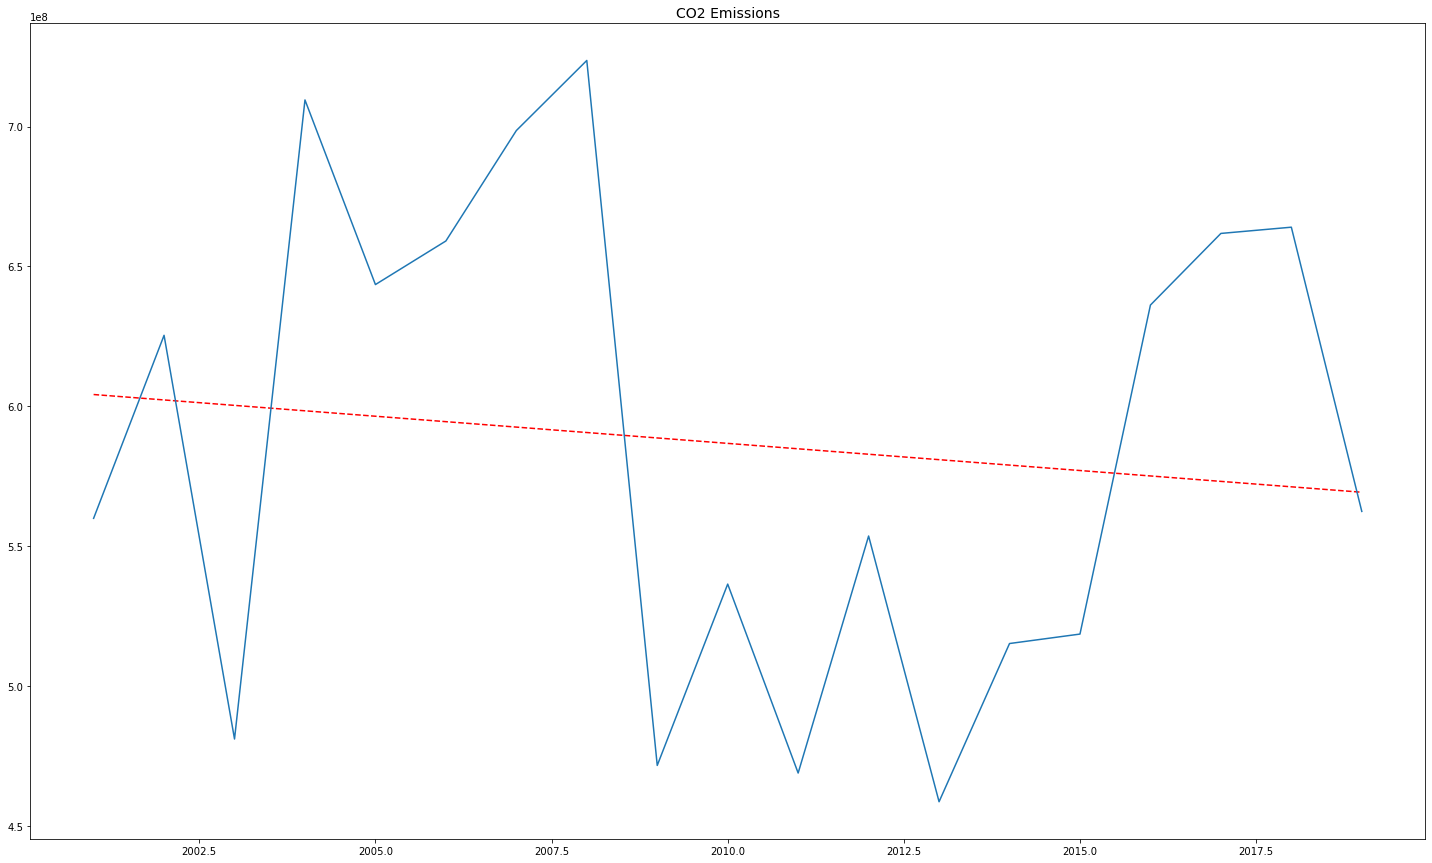

In [11]:
# Visualizing Biomass loss with a trendline

carbonDioxide = tc.whrc_aboveground_co2_emissions__Mg


# create a figure
fig, ax = plt.subplots(figsize=(25, 15))


# plot paramaters
z = np.polyfit(X, carbonDioxide, 1)
p = np.poly1d(z)
ax.plot(X,p(X),"r--")
ax.plot(X, carbonDioxide)
ax.set_title('CO2 Emissions', fontsize=14);